In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import cvxopt

In [2]:
df = pd.read_csv('data_train-2.csv')
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65


In [3]:
df = df.iloc[:,1:]
print(df.head())
print(df.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         109        331          116                  5  5.0   5.0  9.38   
1         346        316           98                  1  1.5   2.0  7.43   
2          99        332          119                  4  5.0   4.5  9.24   
3         210        301          104                  3  3.5   4.0  8.12   
4         242        317          103                  2  2.5   2.0  8.15   

   Research  Chance of Admit   
0         1              0.93  
1         0              0.49  
2         1              0.90  
3         1              0.68  
4         0              0.65  
(320, 9)


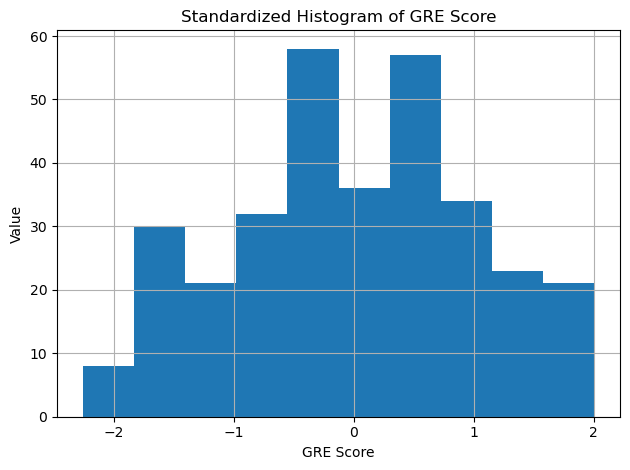

<Figure size 640x480 with 0 Axes>

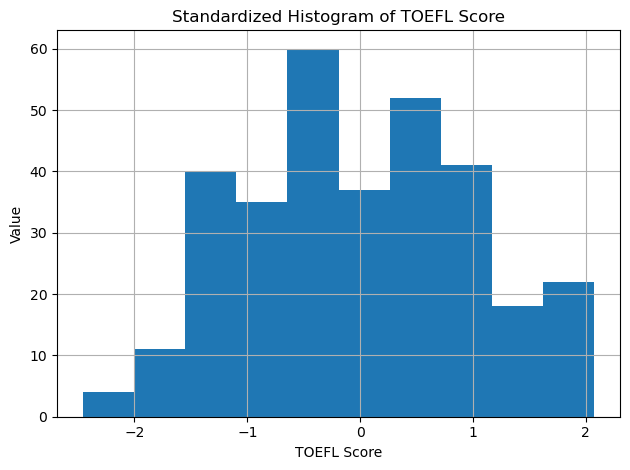

<Figure size 640x480 with 0 Axes>

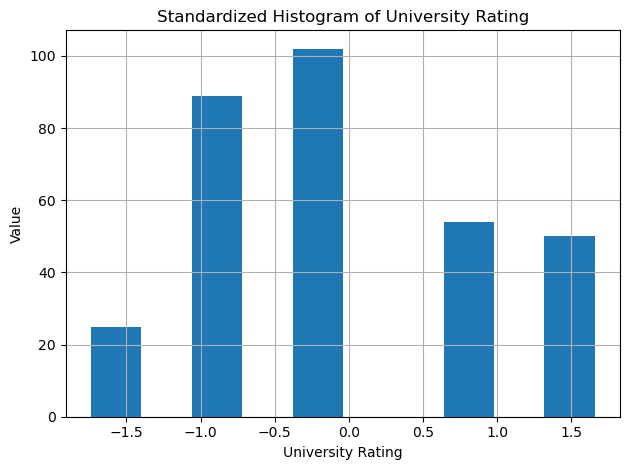

<Figure size 640x480 with 0 Axes>

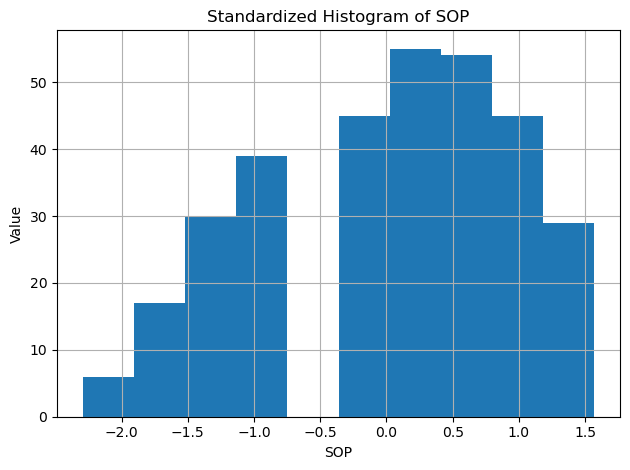

<Figure size 640x480 with 0 Axes>

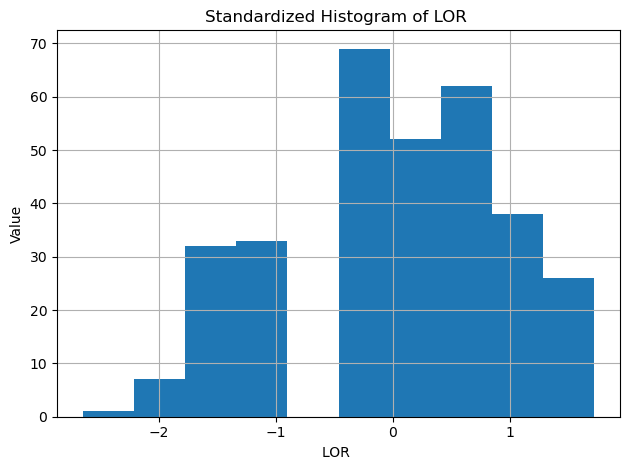

<Figure size 640x480 with 0 Axes>

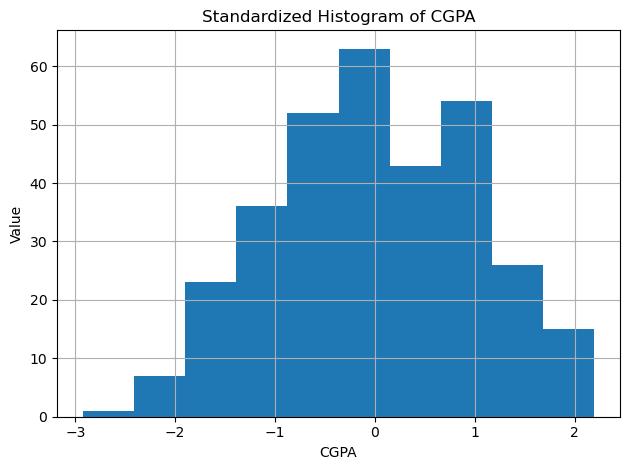

<Figure size 640x480 with 0 Axes>

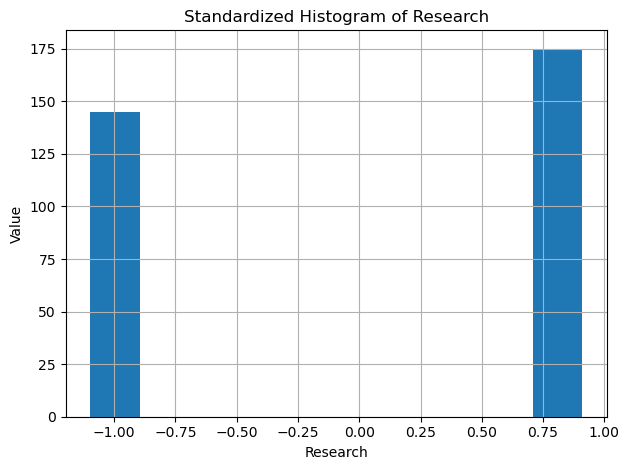

<Figure size 640x480 with 0 Axes>

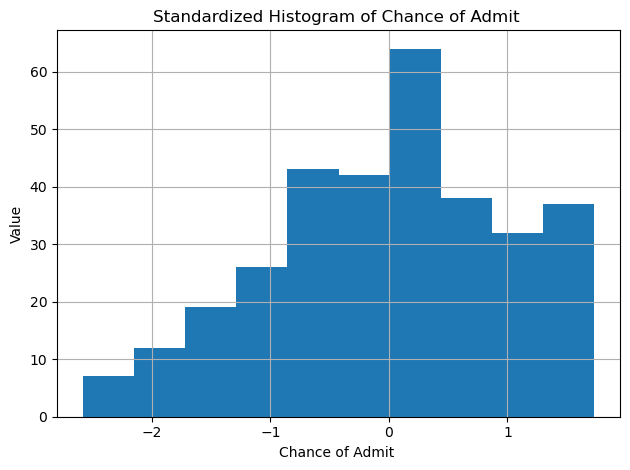

<Figure size 640x480 with 0 Axes>

In [4]:
#Function to standardize the data. Data is standardized in order to being them to the same range.
def standardization_data(df):
    for cols in df.columns[1:]:
        #Computing mean of the data
        mean = df[cols].mean()
        #Computing standard deviation of the data
        std = df[cols].std()
        #Standardizing the feature, the features will have a mean = 0 and standard deviation = 1
        df[cols] = (df[cols] - mean)/std
        #Plotting histogram for all features
        df[cols].hist()
        plt.title(f"Standardized Histogram of {cols}")
        plt.xlabel(cols)
        plt.ylabel("Value")
        plt.tight_layout()
        plt.show()
        plt.tight_layout()
        plt.show()
        
standardization_data(df)

Standardizing the data ensures all features are on a similar scale, giving them a more equal footing in determining the distance between points. Standardization also helps gradient descent converge faster and find a better minimum.

In [5]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0         109   1.236982     1.428736           1.658702  1.569407  1.722520   
1         346  -0.042930    -1.487465          -1.738320 -1.810855 -1.558471   
2          99   1.322309     1.914769           0.809447  1.569407  1.175689   
3         210  -1.322843    -0.515398          -0.039809  0.120724  0.628857   
4         242   0.042397    -0.677409          -0.889064 -0.845065 -1.558471   

       CGPA  Research  Chance of Admit   
0  1.311824  0.908836          1.459696  
1 -1.892632 -1.096871         -1.556524  
2  1.081761  0.908836          1.254045  
3 -0.758747  0.908836         -0.254065  
4 -0.709448 -1.096871         -0.459717  


In [6]:
a = list(df.columns)
median_coa = df[a[8]].median()
print(median_coa)
df["Admit"] = (df[a[8]]>median_coa).astype(int)
print(df.head())

0.02013669837544297
   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0         109   1.236982     1.428736           1.658702  1.569407  1.722520   
1         346  -0.042930    -1.487465          -1.738320 -1.810855 -1.558471   
2          99   1.322309     1.914769           0.809447  1.569407  1.175689   
3         210  -1.322843    -0.515398          -0.039809  0.120724  0.628857   
4         242   0.042397    -0.677409          -0.889064 -0.845065 -1.558471   

       CGPA  Research  Chance of Admit   Admit  
0  1.311824  0.908836          1.459696      1  
1 -1.892632 -1.096871         -1.556524      0  
2  1.081761  0.908836          1.254045      1  
3 -0.758747  0.908836         -0.254065      0  
4 -0.709448 -1.096871         -0.459717      0  


Appending another column named "Admit" to the dataframe which classifies data in "chance of admit" to 1 or 0 based on the median value of the data.

In [7]:
df0 = df[df["Admit"]==0]
print(df0.head())
df1 = df[df["Admit"]==1]
print(df1.head())

   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
1         346  -0.042930    -1.487465          -1.738320 -1.810855 -1.558471   
3         210  -1.322843    -0.515398          -0.039809  0.120724  0.628857   
4         242   0.042397    -0.677409          -0.889064 -0.845065 -1.558471   
6         209  -0.981533    -0.191376          -0.889064 -0.362171 -0.464807   
8         279  -0.725550    -0.677409          -0.889064 -0.362171  0.082025   

       CGPA  Research  Chance of Admit   Admit  
1 -1.892632 -1.096871         -1.556524      0  
3 -0.758747  0.908836         -0.254065      0  
4 -0.709448 -1.096871         -0.459717      0  
6 -0.693015 -1.096871         -0.528267      0  
8 -0.150722 -1.096871         -0.391166      0  
    Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0          109   1.236982     1.428736           1.658702  1.569407  1.722520   
2           99   1.322309     1.914769           0.809447  1.56

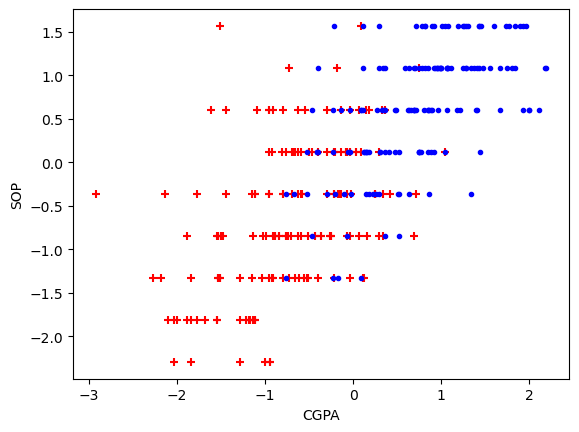

In [8]:
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.scatter(df0['CGPA'], df0['SOP'], color = 'red', marker ='+')
plt.scatter(df1['CGPA'], df1['SOP'], color = 'blue', marker ='.')

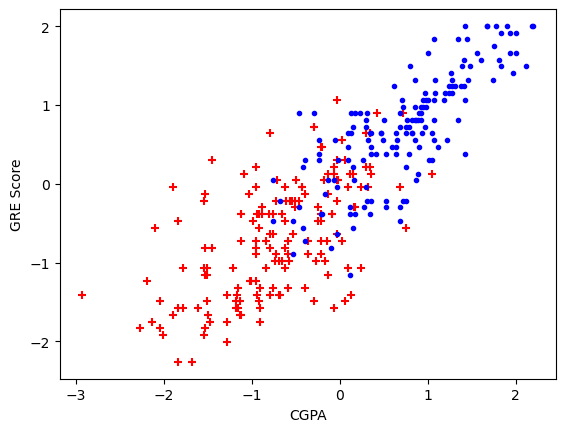

In [9]:
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.scatter(df0['CGPA'], df0['GRE Score'], color = 'red', marker ='+')
plt.scatter(df1['CGPA'], df1['GRE Score'], color = 'blue', marker ='.')

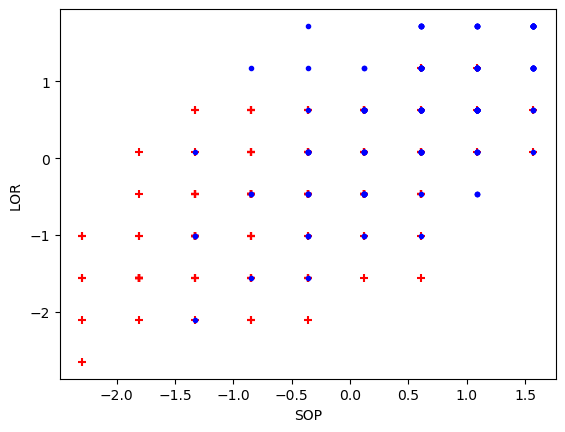

In [10]:
plt.xlabel('SOP')
plt.ylabel('LOR ')
plt.scatter(df0['SOP'], df0['LOR '], color = 'red', marker ='+')
plt.scatter(df1['SOP'], df1['LOR '], color = 'blue', marker ='.')

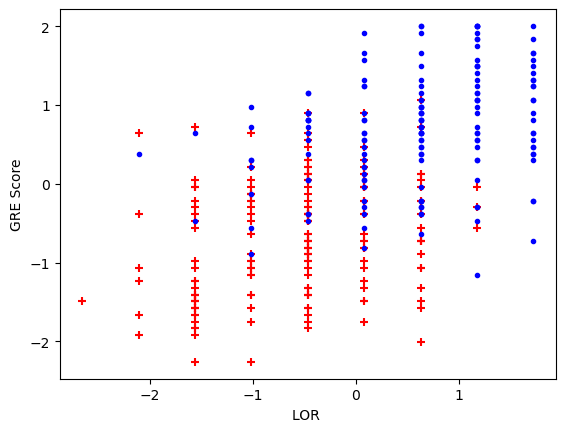

In [11]:
plt.xlabel('LOR ')
plt.ylabel('GRE Score')
plt.scatter(df0['LOR '], df0['GRE Score'], color = 'red', marker ='+')
plt.scatter(df1['LOR '], df1['GRE Score'], color = 'blue', marker ='.')

From the visualization of the raw data, we could see most of the combinations have overlaps. But SOP, LOR looks pretty good as te data seems to be separate.

In [12]:
data_features = df.iloc[:,:9]
data_label = df.iloc[:,9:]
x_train, x_val, y_train, y_val = train_test_split(data_features, data_label, test_size = 0.2 ,random_state =42)

In [13]:
print(x_train)

     Serial No.  GRE Score  TOEFL Score  University Rating       SOP  \
132          63  -1.066860    -0.353387          -0.889064 -0.362171   
317         327  -1.493497    -1.163443          -0.039809 -1.327960   
234          15  -0.469568    -0.515398          -0.039809  0.120724   
312         310  -0.725550     0.456669           0.809447  0.120724   
232         163   0.127725     0.294658          -0.039809 -0.362171   
..          ...        ...          ...                ...       ...   
188         366   1.151654     1.104713           0.809447  1.086513   
71          148   0.810344     1.104713          -0.039809 -0.362171   
106         295  -0.042930    -1.001431          -0.889064 -0.845065   
270          94  -1.322843    -1.649476          -0.889064 -0.362171   
102         169  -2.005462    -1.649476          -0.889064 -1.327960   

         LOR       CGPA  Research  Chance of Admit   
132 -0.464807 -0.627283  0.908836         -1.213772  
317 -1.558471 -0.923079 -1.

In [14]:
x_train_array = x_train.to_numpy()
x_val_array = x_val.to_numpy()
y_train_array = y_train.to_numpy().reshape(-1,1)
y_val_array = y_val.to_numpy().reshape(-1,1)

In [15]:
print(x_train_array.shape)
print(x_train_array)

(256, 9)
[[ 6.30000000e+01 -1.06686011e+00 -3.53386803e-01 ... -6.27282581e-01
   9.08835597e-01 -1.21377163e+00]
 [ 3.27000000e+02 -1.49349750e+00 -1.16344251e+00 ... -9.23078542e-01
  -1.09687055e+00 -5.96817465e-01]
 [ 1.50000000e+01 -4.69567773e-01 -5.15397944e-01 ... -6.27282581e-01
   9.08835597e-01 -7.33918390e-01]
 ...
 [ 2.95000000e+02 -4.29303869e-02 -1.00143137e+00 ... -4.30085273e-01
   9.08835597e-01 -7.33918390e-01]
 [ 9.40000000e+01 -1.32284254e+00 -1.64947594e+00 ... -1.15314207e+00
   9.08835597e-01 -1.89927625e+00]
 [ 1.69000000e+02 -2.00546236e+00 -1.64947594e+00 ... -1.28460694e+00
   9.08835597e-01 -5.28267002e-01]]


In [16]:
x_CGPA_array = x_train_array[:,6].reshape(-1,1)
x_SOP_array = x_train_array[:,4].reshape(-1,1)
x_LOR_array = x_train_array[:,5].reshape(-1,1)
x_GREScore_array = x_train_array[:,1].reshape(-1,1)

x_CGPA_array_val = x_val_array[:,6].reshape(-1,1)
x_SOP_array_val = x_val_array[:,4].reshape(-1,1)
x_LOR_array_val = x_val_array[:,5].reshape(-1,1)
x_GREScore_array_val = x_val_array[:,1].reshape(-1,1)

In [17]:
pairs_train = []

# CGPA and SOP
pair_name = "CGPA_SOP"
pair = np.concatenate((x_CGPA_array, x_SOP_array), axis=1)
pairs_train.append((pair_name, pair))

# CGPA and GRE Score
pair_name = "CGPA_GREScore"
pair = np.concatenate((x_CGPA_array, x_GREScore_array), axis=1)
pairs_train.append((pair_name, pair))

# SOP and LOR
pair_name = "SOP_LOR"
pair = np.concatenate((x_SOP_array, x_LOR_array), axis=1)
pairs_train.append((pair_name, pair))

# LOR and GRE Score
pair_name = "LOR_GREScore"
pair = np.concatenate((x_LOR_array, x_GREScore_array), axis=1)
pairs_train.append((pair_name, pair))

pairs_val = []

# CGPA and SOP
pair_name = "CGPA_SOP"
pair = np.concatenate((x_CGPA_array_val, x_SOP_array_val), axis=1)
pairs_val.append((pair_name, pair))

# CGPA and GRE Score
pair_name = "CGPA_GREScore"
pair = np.concatenate((x_CGPA_array_val, x_GREScore_array_val), axis=1)
pairs_val.append((pair_name, pair))

# SOP and LOR
pair_name = "SOP_LOR"
pair = np.concatenate((x_SOP_array_val, x_LOR_array_val), axis=1)
pairs_val.append((pair_name, pair))

# LOR and GRE Score
pair_name = "LOR_GREScore"
pair = np.concatenate((x_LOR_array_val, x_GREScore_array_val), axis=1)
pairs_val.append((pair_name, pair))

Pair: CGPA_SOP, Kernel: linear


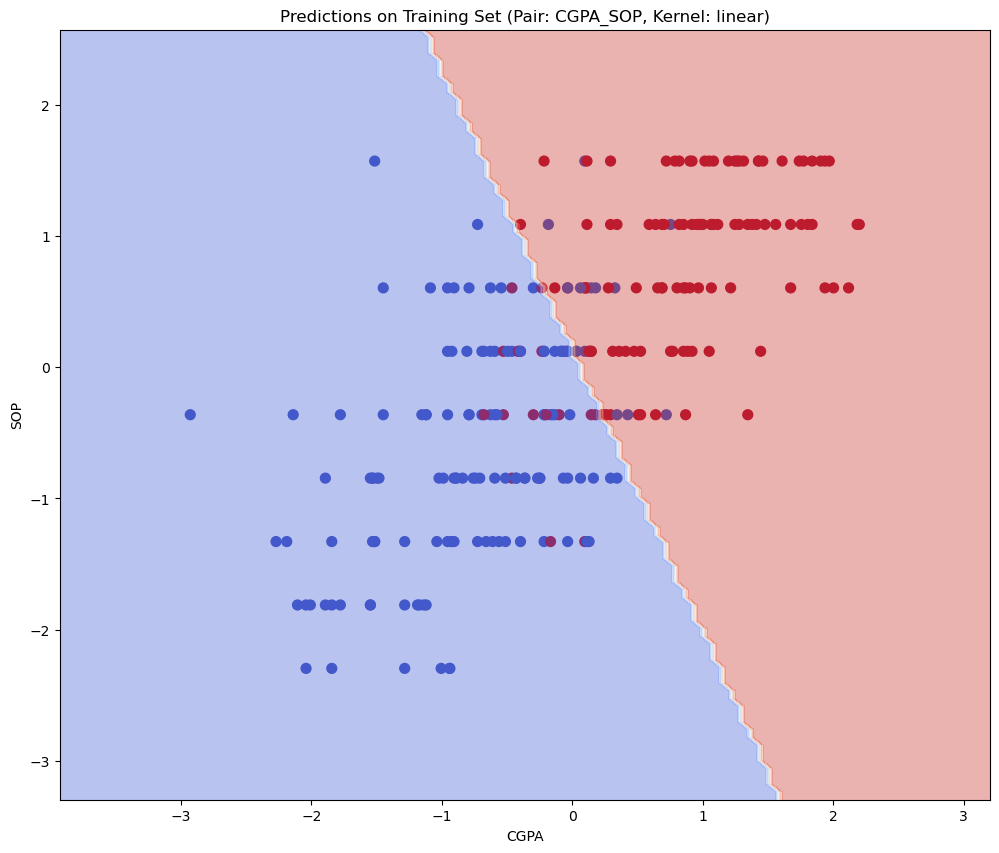

Support vectors are:  [[ 0.03004178  0.12072363]
 [-0.13428931 -0.3621709 ]
 [ 0.17793976  0.60361817]
 [ 0.24367219 -0.3621709 ]
 [ 0.09577421  1.56940725]
 [ 0.12864043 -1.32795998]
 [ 0.75309857  1.08651271]
 [-0.21645486 -0.3621709 ]
 [ 0.062908   -0.84506544]
 [-0.06855688  0.12072363]
 [ 0.72023235 -0.3621709 ]
 [ 0.32583774  0.60361817]
 [-0.46295149  0.12072363]
 [-0.2986204   0.60361817]
 [-0.13428931  0.12072363]
 [-0.54511704  0.60361817]
 [ 0.14507354  0.60361817]
 [-0.08498999  0.12072363]
 [-0.62728258  0.60361817]
 [-0.01925755 -0.3621709 ]
 [-0.06855688 -0.84506544]
 [-0.21645486  0.12072363]
 [-0.72588123  1.08651271]
 [-0.16715553 -0.3621709 ]
 [-0.08498999  0.12072363]
 [ 0.03004178  0.12072363]
 [ 0.29297152 -0.84506544]
 [-0.18358864  1.08651271]
 [ 0.09577421  0.12072363]
 [ 0.16150665 -0.84506544]
 [-0.49581771  0.12072363]
 [-0.21645486 -0.3621709 ]
 [ 0.34227085 -0.3621709 ]
 [-0.15072242 -0.3621709 ]
 [-0.39721906  0.12072363]
 [-0.79161367  0.60361817]
 [ 0.3

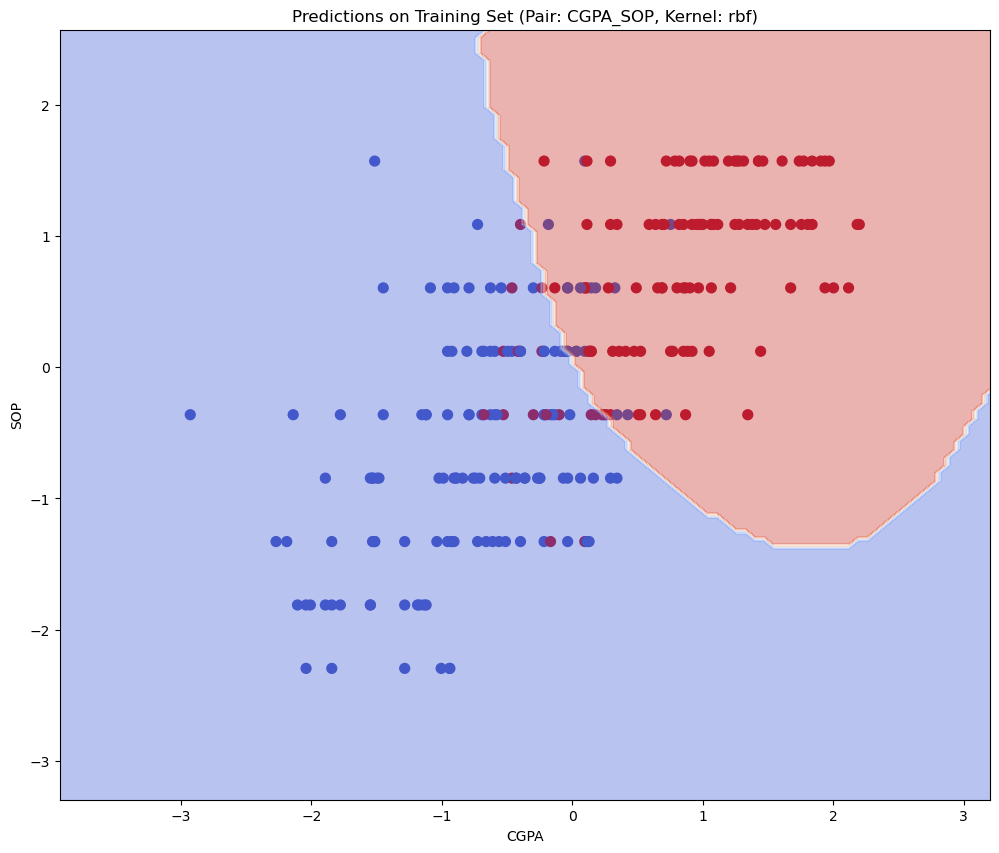

Support vectors are:  [[ 0.03004178  0.12072363]
 [-0.13428931 -0.3621709 ]
 [ 0.17793976  0.60361817]
 [-1.84333264 -1.32795998]
 [ 0.24367219 -0.3621709 ]
 [ 0.09577421  1.56940725]
 [ 0.12864043 -1.32795998]
 [ 0.75309857  1.08651271]
 [-0.21645486 -0.3621709 ]
 [-0.59441636  0.12072363]
 [ 0.062908   -0.84506544]
 [-0.06855688  0.12072363]
 [ 0.72023235 -0.3621709 ]
 [ 0.32583774  0.60361817]
 [-0.46295149  0.12072363]
 [-0.2986204   0.60361817]
 [-0.13428931  0.12072363]
 [-0.54511704  0.60361817]
 [ 0.14507354  0.60361817]
 [-0.08498999  0.12072363]
 [-0.62728258  0.60361817]
 [-2.04052995 -2.29374905]
 [-2.92791783 -0.3621709 ]
 [-0.01925755 -0.3621709 ]
 [-0.06855688 -0.84506544]
 [-0.21645486  0.12072363]
 [-0.72588123  1.08651271]
 [-0.16715553 -0.3621709 ]
 [-0.08498999  0.12072363]
 [ 0.03004178  0.12072363]
 [ 0.29297152 -0.84506544]
 [-0.18358864  1.08651271]
 [ 0.09577421  0.12072363]
 [ 0.16150665 -0.84506544]
 [-0.49581771  0.12072363]
 [-0.21645486 -0.3621709 ]
 [-0.9

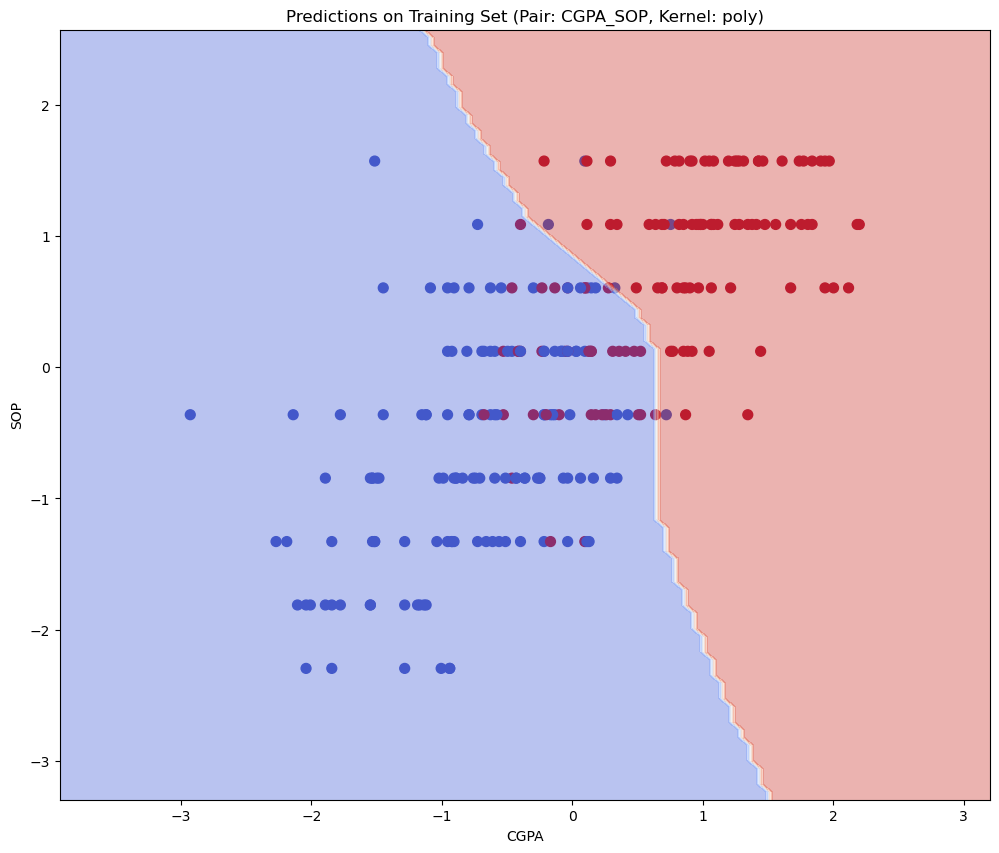

Support vectors are:  [[-0.62728258 -0.3621709 ]
 [-0.62728258  0.12072363]
 [ 0.03004178  0.12072363]
 [-0.13428931 -0.3621709 ]
 [-0.67658191  0.12072363]
 [ 0.17793976  0.60361817]
 [-0.69301502 -0.3621709 ]
 [ 0.24367219 -0.3621709 ]
 [ 0.09577421  1.56940725]
 [ 0.75309857  1.08651271]
 [-0.59441636 -0.3621709 ]
 [-0.21645486 -0.3621709 ]
 [-0.59441636  0.12072363]
 [ 0.062908   -0.84506544]
 [-0.06855688  0.12072363]
 [ 0.72023235 -0.3621709 ]
 [ 0.32583774  0.60361817]
 [-0.46295149  0.12072363]
 [-0.2986204   0.60361817]
 [-0.13428931  0.12072363]
 [-0.54511704  0.60361817]
 [-0.36435284 -0.84506544]
 [ 0.14507354  0.60361817]
 [-0.24932107 -0.84506544]
 [-0.08498999  0.12072363]
 [-0.62728258  0.60361817]
 [-0.69301502  0.12072363]
 [-0.26575418 -0.84506544]
 [-0.01925755 -0.3621709 ]
 [-0.06855688 -0.84506544]
 [-0.21645486  0.12072363]
 [-0.72588123  1.08651271]
 [-0.16715553 -0.3621709 ]
 [-0.08498999  0.12072363]
 [ 0.03004178  0.12072363]
 [ 0.29297152 -0.84506544]
 [-0.1

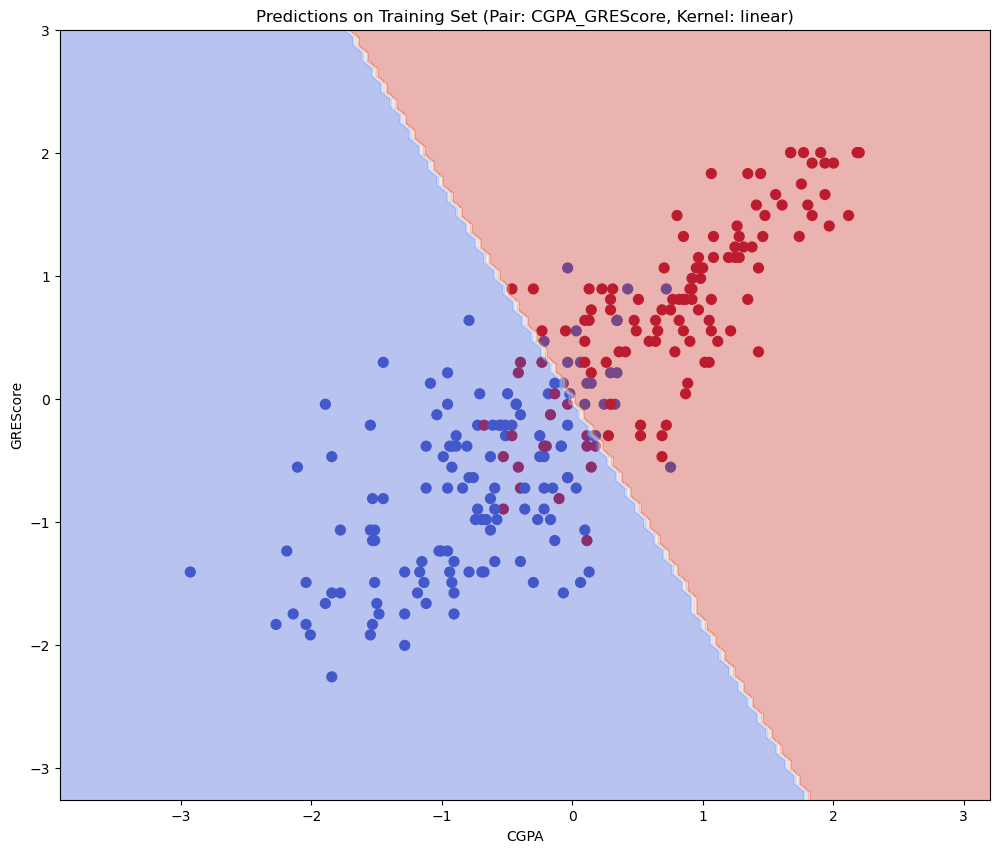

Support vectors are:  [[ 0.03004178 -0.7255502 ]
 [-0.13428931  0.12772457]
 [ 0.17793976 -0.29891282]
 [ 0.24367219 -0.04293039]
 [ 0.09577421 -1.06686011]
 [ 0.12864043 -1.40817002]
 [ 0.75309857 -0.55489525]
 [-0.39721906 -0.12825786]
 [-0.21645486 -0.7255502 ]
 [ 0.062908    0.29837952]
 [ 0.72023235  0.89567186]
 [ 0.32583774 -0.04293039]
 [-0.46295149 -0.21358534]
 [-0.21645486 -0.3842403 ]
 [-0.54511704 -0.21358534]
 [ 0.14507354  0.12772457]
 [-0.24932107 -0.46956777]
 [-0.08498999 -0.3842403 ]
 [-0.01925755  0.04239709]
 [-0.06855688  0.12772457]
 [-0.21645486 -0.46956777]
 [-0.08498999 -0.3842403 ]
 [ 0.03004178  0.55436195]
 [ 0.29297152  0.21305204]
 [-0.18358864  0.04239709]
 [ 0.09577421 -0.04293039]
 [ 0.16150665 -0.29891282]
 [-0.49581771  0.04239709]
 [-0.21645486  0.46903448]
 [ 0.34227085  0.21305204]
 [-0.15072242 -0.7255502 ]
 [-0.43008527 -0.04293039]
 [-0.79161367  0.63968943]
 [ 0.34227085  0.63968943]
 [-0.51225082 -0.21358534]
 [-0.03569066 -0.64022273]
 [-0.2

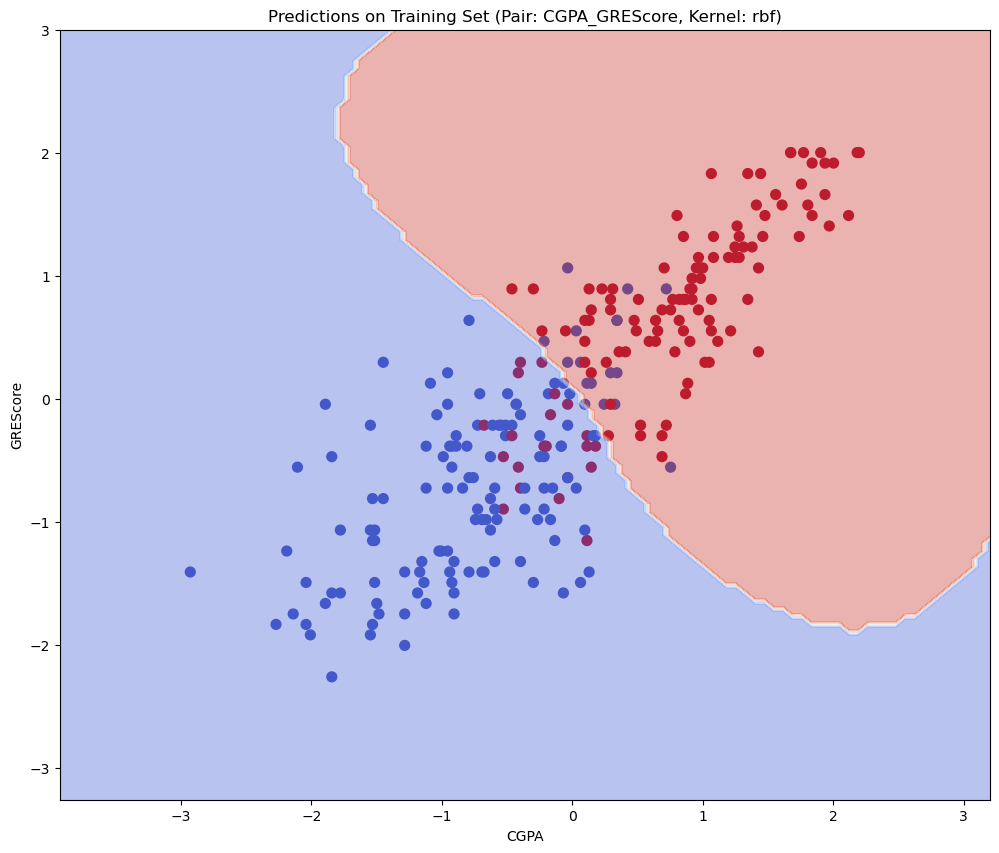

Support vectors are:  [[ 0.03004178 -0.7255502 ]
 [-0.13428931  0.12772457]
 [ 0.17793976 -0.29891282]
 [-1.44893803  0.29837952]
 [-1.84333264 -2.26144479]
 [ 0.24367219 -0.04293039]
 [ 0.09577421 -1.06686011]
 [ 0.12864043 -1.40817002]
 [ 0.75309857 -0.55489525]
 [-0.39721906 -0.12825786]
 [-0.21645486 -0.7255502 ]
 [ 0.062908    0.29837952]
 [ 0.72023235  0.89567186]
 [-2.10626239 -0.55489525]
 [ 0.32583774 -0.04293039]
 [-0.46295149 -0.21358534]
 [-0.21645486 -0.3842403 ]
 [ 0.14507354  0.12772457]
 [-0.24932107 -0.46956777]
 [-0.08498999 -0.3842403 ]
 [-2.92791783 -1.40817002]
 [-0.01925755  0.04239709]
 [-0.06855688  0.12772457]
 [-0.21645486 -0.46956777]
 [-0.08498999 -0.3842403 ]
 [ 0.03004178  0.55436195]
 [ 0.29297152  0.21305204]
 [-0.18358864  0.04239709]
 [ 0.09577421 -0.04293039]
 [ 0.16150665 -0.29891282]
 [-0.49581771  0.04239709]
 [-0.21645486  0.46903448]
 [ 0.34227085  0.21305204]
 [-0.15072242 -0.7255502 ]
 [-0.43008527 -0.04293039]
 [-0.79161367  0.63968943]
 [ 0.3

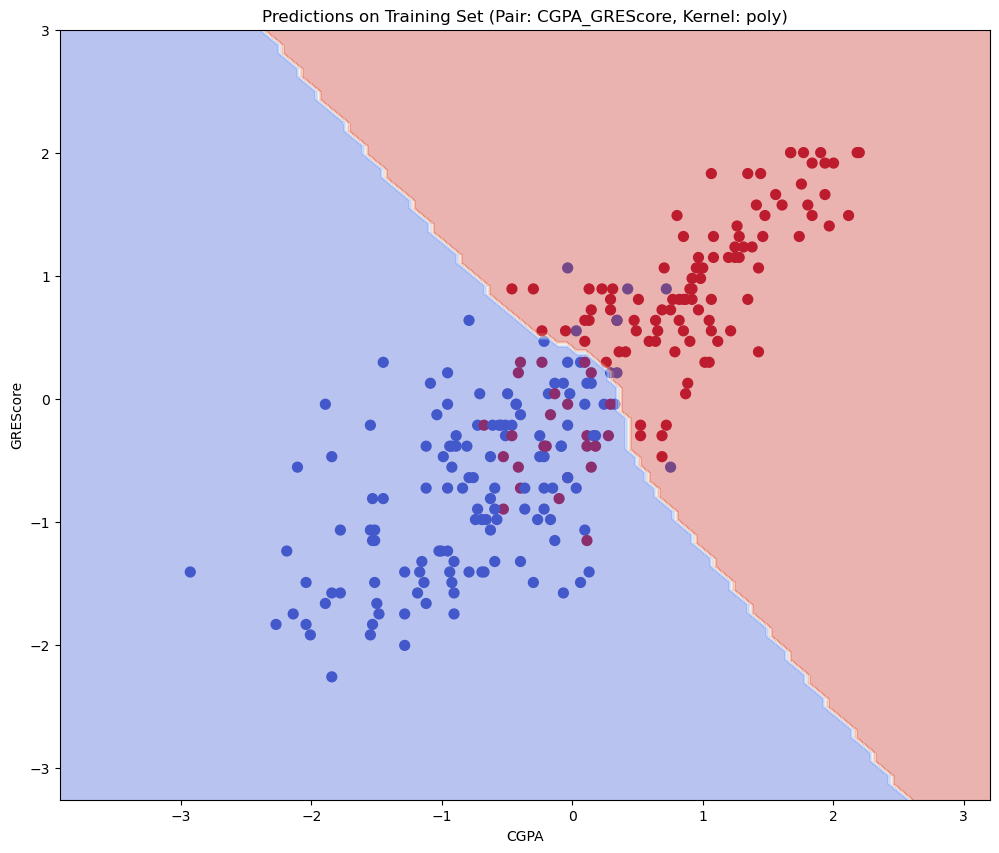

Support vectors are:  [[-0.62728258 -0.46956777]
 [ 0.03004178 -0.7255502 ]
 [-0.13428931  0.12772457]
 [ 0.17793976 -0.29891282]
 [ 0.24367219 -0.04293039]
 [ 0.09577421 -1.06686011]
 [ 0.75309857 -0.55489525]
 [-0.39721906 -0.12825786]
 [-0.21645486 -0.7255502 ]
 [-0.59441636 -0.7255502 ]
 [ 0.062908    0.29837952]
 [ 0.72023235  0.89567186]
 [-0.51225082 -0.29891282]
 [ 0.32583774 -0.04293039]
 [-0.46295149 -0.21358534]
 [-0.21645486 -0.3842403 ]
 [-0.54511704 -0.21358534]
 [-0.36435284 -0.89620516]
 [-0.56155014 -0.21358534]
 [ 0.14507354  0.12772457]
 [-0.24932107 -0.46956777]
 [-0.08498999 -0.3842403 ]
 [-0.01925755  0.04239709]
 [-0.06855688  0.12772457]
 [-0.21645486 -0.46956777]
 [-0.89021232 -0.29891282]
 [-0.72588123 -0.21358534]
 [-0.16715553 -0.98153264]
 [-0.08498999 -0.3842403 ]
 [ 0.03004178  0.55436195]
 [ 0.29297152  0.21305204]
 [-0.18358864  0.04239709]
 [ 0.09577421 -0.04293039]
 [-0.61084947 -0.21358534]
 [ 0.16150665 -0.29891282]
 [-0.49581771  0.04239709]
 [-0.7

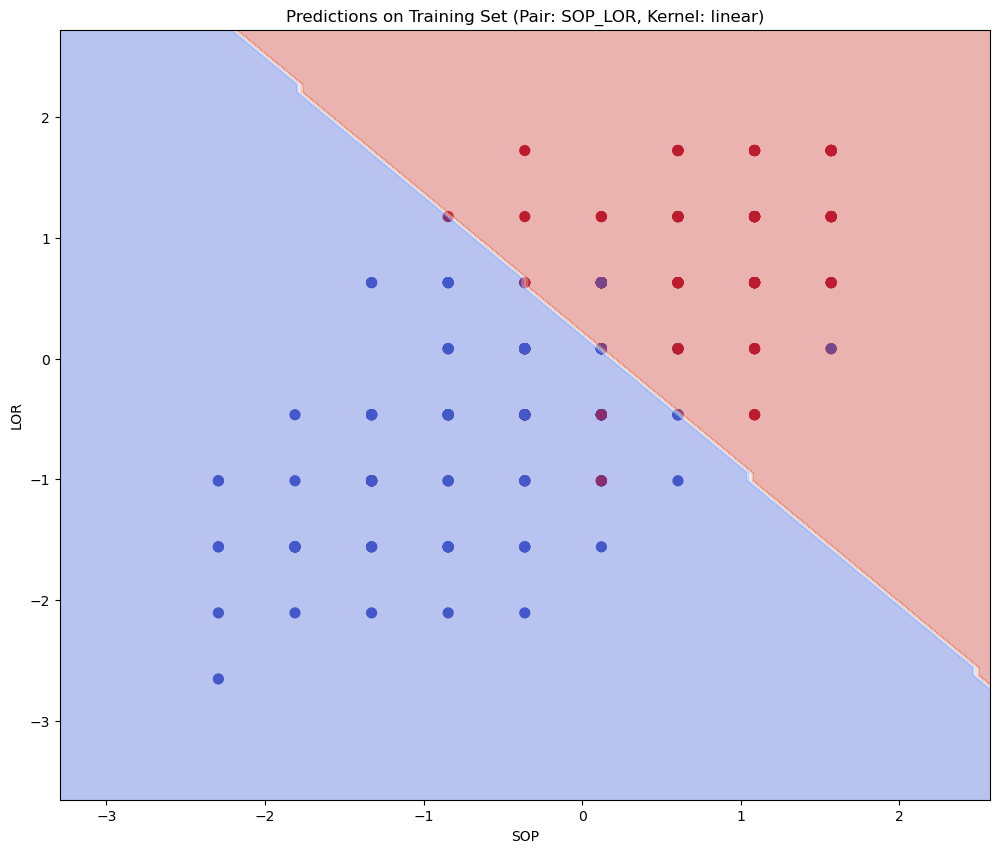

Support vectors are:  [[ 0.12072363 -0.46480711]
 [ 0.12072363 -1.01163901]
 [ 0.60361817  1.17568858]
 [-0.3621709   0.08202478]
 [ 1.56940725  0.62885668]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.62885668]
 [ 1.08651271  1.17568858]
 [-0.3621709   0.62885668]
 [ 0.12072363  0.08202478]
 [ 0.12072363  0.62885668]
 [-0.3621709  -0.46480711]
 [ 0.60361817  1.17568858]
 [ 0.12072363 -1.01163901]
 [ 0.60361817  0.62885668]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.08202478]
 [ 0.60361817  0.08202478]
 [ 0.12072363 -0.46480711]
 [ 0.60361817 -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.08202478]
 [-0.84506544  0.08202478]
 [ 0.12072363 -0.46480711]
 [ 1.08651271  0.08202478]
 [-0.3621709  -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 1.08651271  0.62885668]
 [-0.3621709  -0.46480711]
 [ 0.12072363  0.08202478]
 [-0.84506544  0.08202478]
 [ 0.12072363 -0.46480711]
 [-0.3621709  -0.46480711]
 [-0.3621709   0.08202478]
 [-0.3621709   0.08202478]
 [ 0.1

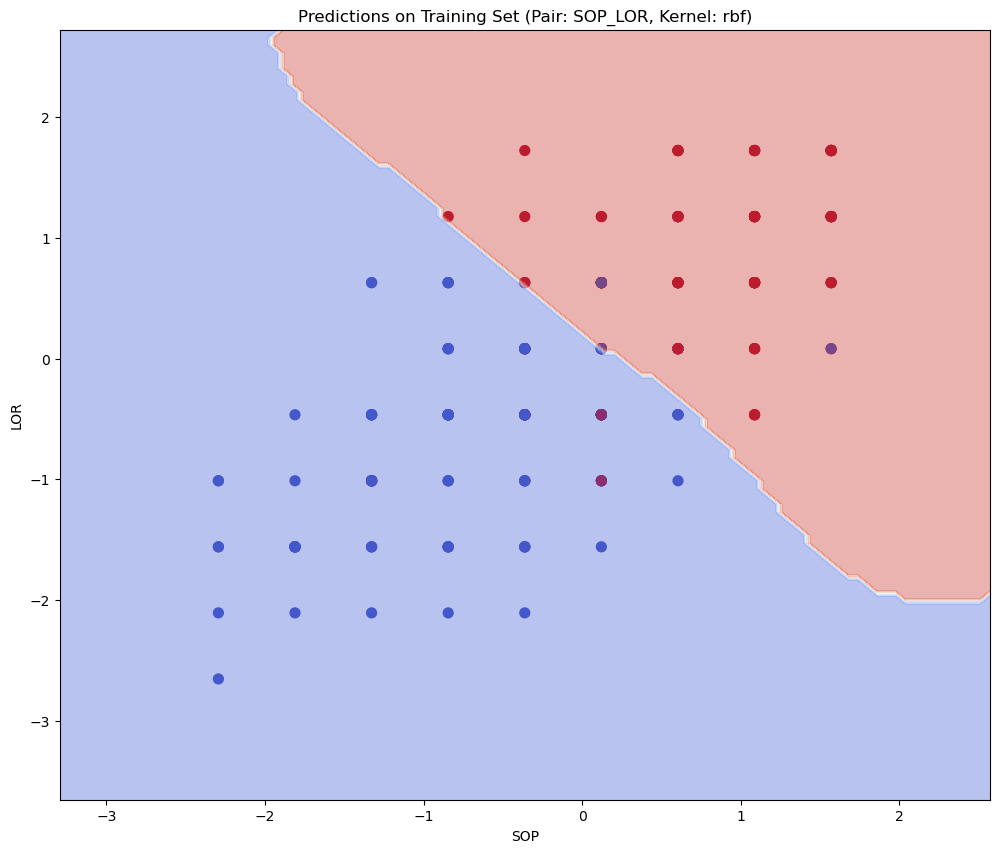

Support vectors are:  [[ 0.12072363 -0.46480711]
 [ 0.12072363 -1.01163901]
 [ 0.60361817  1.17568858]
 [-0.3621709   0.08202478]
 [ 1.56940725  0.62885668]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.62885668]
 [ 1.08651271  1.17568858]
 [-0.3621709   0.62885668]
 [ 0.12072363  0.08202478]
 [ 0.12072363  0.62885668]
 [ 0.60361817  1.17568858]
 [ 0.12072363 -1.01163901]
 [ 0.60361817  0.62885668]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.08202478]
 [ 0.60361817  0.08202478]
 [ 0.12072363 -0.46480711]
 [ 0.60361817 -0.46480711]
 [ 0.12072363 -0.46480711]
 [-2.29374905 -2.65213469]
 [ 0.60361817  0.08202478]
 [ 0.12072363 -0.46480711]
 [ 1.08651271  0.08202478]
 [-0.3621709  -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 1.08651271  0.62885668]
 [-0.3621709  -0.46480711]
 [ 0.12072363  0.08202478]
 [-1.32795998 -1.01163901]
 [ 0.12072363 -0.46480711]
 [-0.3621709  -0.46480711]
 [-2.29374905 -1.01163901]
 [-0.3621709   0.08202478]
 [-0.3621709   0.08202478]
 [ 0.1

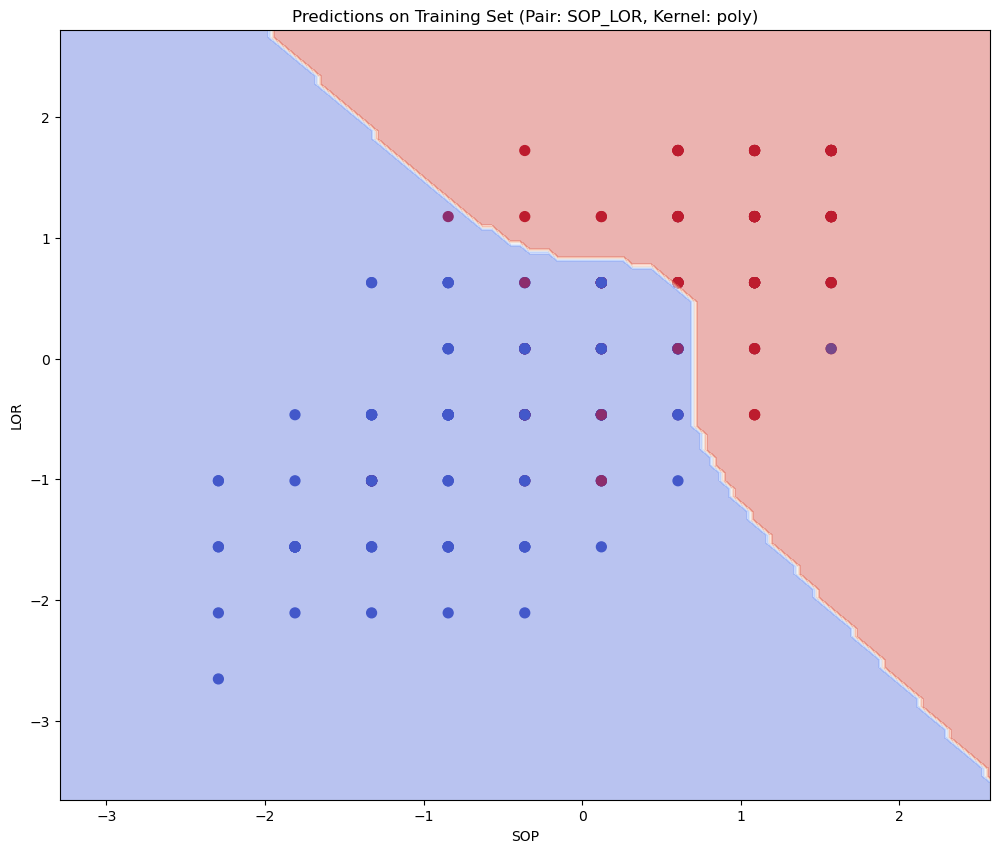

Support vectors are:  [[-0.3621709  -0.46480711]
 [ 0.12072363 -0.46480711]
 [-0.3621709  -0.46480711]
 [ 0.60361817  1.17568858]
 [-0.3621709  -0.46480711]
 [-0.3621709  -0.46480711]
 [-0.3621709   0.08202478]
 [ 1.56940725  0.62885668]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.62885668]
 [ 1.08651271  1.17568858]
 [-0.3621709   0.62885668]
 [ 0.12072363  0.08202478]
 [-0.84506544 -0.46480711]
 [-0.84506544 -0.46480711]
 [ 0.12072363  0.62885668]
 [-0.3621709  -0.46480711]
 [-0.84506544  0.08202478]
 [ 0.60361817  1.17568858]
 [ 0.12072363 -1.01163901]
 [-0.84506544 -0.46480711]
 [ 0.60361817  0.62885668]
 [-0.84506544  0.08202478]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.08202478]
 [-0.84506544 -0.46480711]
 [ 0.60361817  0.08202478]
 [-0.84506544 -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 0.60361817 -0.46480711]
 [ 0.12072363 -0.46480711]
 [ 0.60361817  0.08202478]
 [-0.84506544  0.08202478]
 [ 0.12072363 -0.46480711]
 [-0.84506544 -0.46480711]
 [ 1.08651271  0.08202478]
 [-0.3

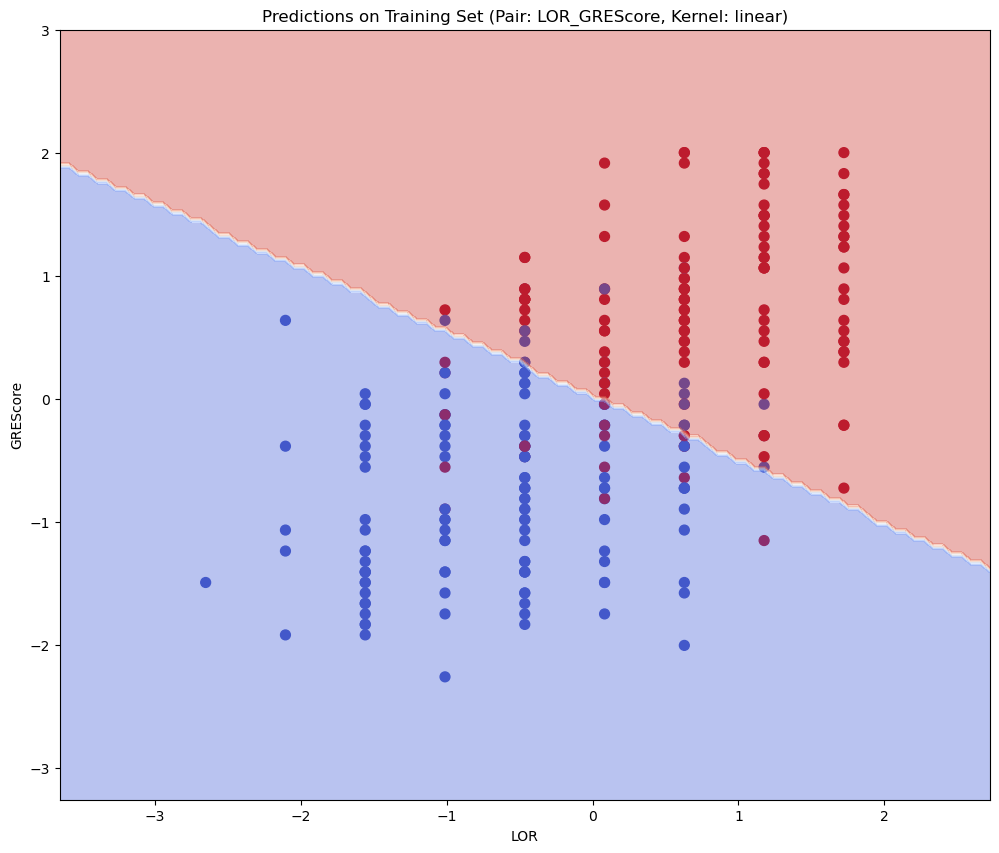

Support vectors are:  [[-0.46480711  0.12772457]
 [ 1.17568858 -0.29891282]
 [-0.46480711  0.29837952]
 [ 0.08202478 -0.04293039]
 [ 0.62885668  0.12772457]
 [ 1.17568858 -0.55489525]
 [ 0.62885668 -0.7255502 ]
 [-0.46480711  0.29837952]
 [-0.46480711  0.89567186]
 [-0.46480711 -0.29891282]
 [ 1.17568858 -0.04293039]
 [ 0.08202478 -0.3842403 ]
 [ 0.08202478 -0.21358534]
 [ 0.08202478  0.12772457]
 [-1.01163901  0.04239709]
 [ 0.08202478  0.12772457]
 [-0.46480711 -0.29891282]
 [ 0.08202478 -0.21358534]
 [-0.46480711 -0.3842403 ]
 [-0.46480711  0.55436195]
 [-0.46480711  0.21305204]
 [ 0.62885668  0.04239709]
 [ 0.08202478 -0.04293039]
 [-0.46480711 -0.21358534]
 [-0.46480711  0.04239709]
 [-0.46480711  0.46903448]
 [-1.01163901  0.21305204]
 [ 0.08202478 -0.04293039]
 [ 0.62885668 -0.04293039]
 [-1.01163901  0.63968943]
 [ 0.62885668 -0.3842403 ]
 [ 0.62885668 -0.7255502 ]
 [-2.1053028   0.63968943]
 [ 0.62885668 -0.21358534]
 [ 0.08202478 -0.64022273]
 [-0.46480711  0.12772457]
 [ 0.0

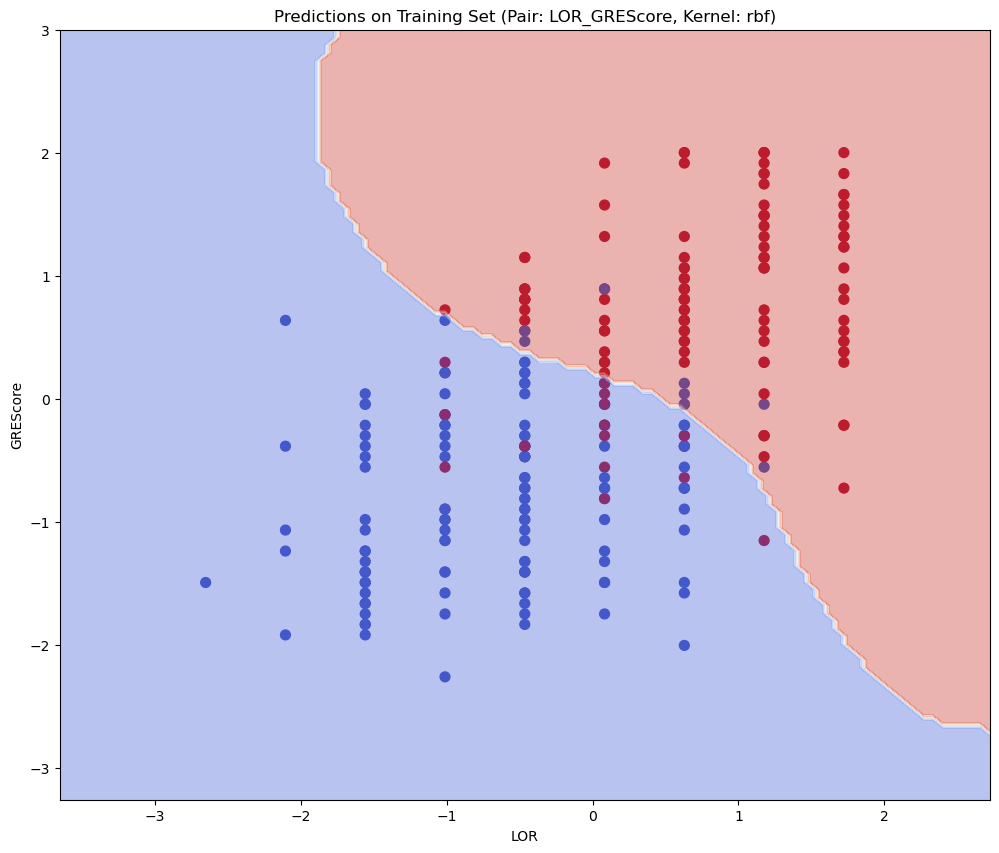

Support vectors are:  [[-0.46480711  0.12772457]
 [-1.01163901 -1.40817002]
 [ 1.17568858 -0.29891282]
 [-0.46480711  0.29837952]
 [-1.01163901 -2.26144479]
 [ 0.08202478 -0.04293039]
 [ 0.62885668 -1.06686011]
 [ 0.62885668  0.12772457]
 [ 1.17568858 -0.55489525]
 [-1.01163901 -0.12825786]
 [ 0.62885668 -0.7255502 ]
 [-0.46480711  0.29837952]
 [-0.46480711  0.89567186]
 [ 1.17568858 -0.04293039]
 [ 0.08202478 -0.3842403 ]
 [-1.5584709  -1.23751507]
 [-1.01163901 -0.12825786]
 [ 0.08202478 -0.21358534]
 [ 0.08202478  0.12772457]
 [-2.65213469 -1.4934975 ]
 [-1.01163901  0.04239709]
 [ 0.08202478  0.12772457]
 [ 0.08202478 -0.21358534]
 [-0.46480711  0.55436195]
 [-0.46480711  0.21305204]
 [ 0.62885668  0.04239709]
 [ 0.08202478 -0.04293039]
 [-0.46480711 -0.21358534]
 [-0.46480711  0.04239709]
 [-0.46480711  0.46903448]
 [-1.01163901 -1.40817002]
 [-1.01163901  0.21305204]
 [ 0.08202478 -0.04293039]
 [ 0.62885668 -0.04293039]
 [-1.01163901  0.63968943]
 [ 0.62885668 -0.3842403 ]
 [ 0.6

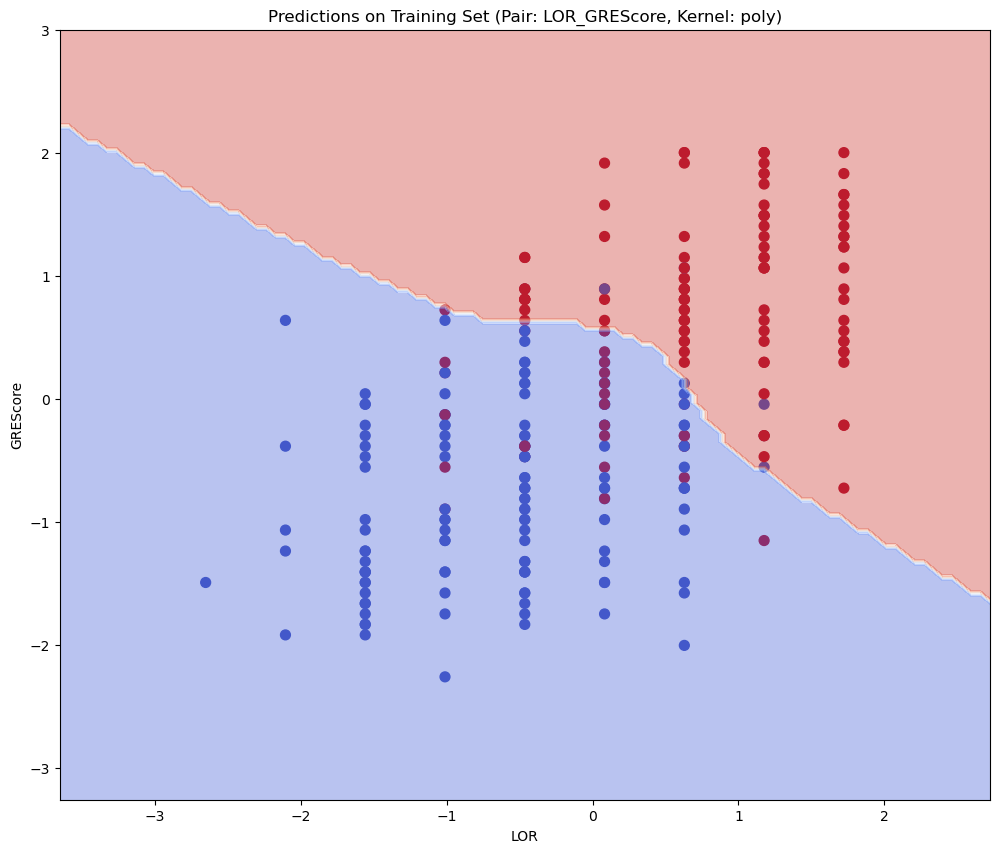

Support vectors are:  [[-0.46480711 -0.7255502 ]
 [-0.46480711  0.12772457]
 [-0.46480711 -0.64022273]
 [ 1.17568858 -0.29891282]
 [-0.46480711  0.29837952]
 [-0.46480711 -0.46956777]
 [ 0.08202478 -0.04293039]
 [-0.46480711 -0.7255502 ]
 [ 0.62885668  0.12772457]
 [ 1.17568858 -0.55489525]
 [-1.01163901 -0.12825786]
 [ 0.62885668 -0.7255502 ]
 [ 0.08202478 -0.7255502 ]
 [-0.46480711  0.29837952]
 [-0.46480711  0.89567186]
 [-0.46480711 -0.29891282]
 [ 1.17568858 -0.04293039]
 [-0.46480711 -0.7255502 ]
 [ 0.08202478 -0.3842403 ]
 [-1.01163901 -0.12825786]
 [ 0.08202478 -0.21358534]
 [ 0.08202478  0.12772457]
 [-0.46480711 -0.46956777]
 [-0.46480711 -0.3842403 ]
 [-0.46480711 -0.3842403 ]
 [-1.01163901  0.04239709]
 [ 0.08202478 -0.81087768]
 [ 0.08202478  0.12772457]
 [-0.46480711 -0.46956777]
 [-0.46480711 -0.29891282]
 [ 0.08202478 -0.21358534]
 [-0.46480711 -0.3842403 ]
 [-0.46480711  0.55436195]
 [-0.46480711  0.21305204]
 [ 0.62885668  0.04239709]
 [-0.46480711 -0.64022273]
 [ 0.0

In [18]:
pairs_train = [
    ("CGPA_SOP", np.concatenate((x_CGPA_array, x_SOP_array), axis=1)),
    ("CGPA_GREScore", np.concatenate((x_CGPA_array, x_GREScore_array), axis=1)),
    ("SOP_LOR", np.concatenate((x_SOP_array, x_LOR_array), axis=1)),
    ("LOR_GREScore", np.concatenate((x_LOR_array, x_GREScore_array), axis=1))
]

pairs_val = [
    ("CGPA_SOP", np.concatenate((x_CGPA_array_val, x_SOP_array_val), axis=1)),
    ("CGPA_GREScore", np.concatenate((x_CGPA_array_val, x_GREScore_array_val), axis=1)),
    ("SOP_LOR", np.concatenate((x_SOP_array_val, x_LOR_array_val), axis=1)),
    ("LOR_GREScore", np.concatenate((x_LOR_array_val, x_GREScore_array_val), axis=1))
]

kernels = ["linear", "rbf", "poly"]

for pair_name, pair in pairs_train:
    for kernel_type in kernels:
        print(f"Pair: {pair_name}, Kernel: {kernel_type}")
        clf = svm.SVC(kernel = kernel_type)
        clf.fit(pair, y_train_array.ravel())
        
        # Visualize predictions on training set
        plt.figure(figsize=(12, 10))
        plt.scatter(pair[:, 0], pair[:, 1], c=y_train_array, s=50, cmap=plt.cm.coolwarm)
        plt.xlim(pair[:, 0].min() - 1, pair[:, 0].max() + 1)
        plt.ylim(pair[:, 1].min() - 1, pair[:, 1].max() + 1)
        xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                                 np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
        
        # Plot decision boundary for rbf, linear and polynomial kernels
        if kernel_type in ["linear", "poly", "rbf"]:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4) #'viridis'
      
        plt.title(f"Predictions on Training Set (Pair: {pair_name}, Kernel: {kernel_type})")
        plt.xlabel(pair_name.split("_")[0])
        plt.ylabel(pair_name.split("_")[1])
        plt.show()
        support_vectors = clf.support_vectors_
        print("Support vectors are: ", support_vectors)
        n_support_vectors_per_class = np.count_nonzero(clf.support_)
        print("Number of support vectors: ", n_support_vectors_per_class)
        avg_accuracy = 0
        for feature_name, feature in pairs_val:
            print(f"Predicting for Pair: {feature_name}, using Model: {pair_name} and Kernel: {kernel_type}")
            y_predictions= clf.predict(feature)
            accuracy = metrics.accuracy_score(y_val_array, y_predictions)
            avg_accuracy = avg_accuracy + accuracy
            print("Accuracy:", accuracy)
        print("Average accuracy is: ", avg_accuracy/4)
        print("------------------------------------------------------------------------------------------------")
        print("------------------------------------------------------------------------------------------------")

From the above predictions, we could see that the combination of CGPA_SOP with a linear kernel looks better overall average accuracy but CGPA_SOP with a rbf kernel outperforms other models with highest accuracy for a particular data and has a good overall accuracy.

Thus, I'm selecting CGPA_SOP pair with rbf kernel to be the best model and go about performing the classification of test data. And also the number of misclassifications seems to be less visually.

In [19]:
df_test = pd.read_csv('data_test-2.csv')
df_test.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,328,295,101,2,2.5,2.0,7.86,0
1,1,325,315,104,3,3.0,2.5,8.33,0
2,2,191,324,111,5,4.5,4.0,9.16,1
3,3,49,321,110,3,3.5,5.0,8.85,1
4,4,180,307,102,3,3.0,3.0,8.27,0


In [20]:
df_test = df_test.iloc[:,1:]
print(df_test.head())
print(df_test.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         328        295          101                  2  2.5   2.0  7.86   
1         325        315          104                  3  3.0   2.5  8.33   
2         191        324          111                  5  4.5   4.0  9.16   
3          49        321          110                  3  3.5   5.0  8.85   
4         180        307          102                  3  3.0   3.0  8.27   

   Research  
0         0  
1         0  
2         1  
3         1  
4         0  
(80, 8)


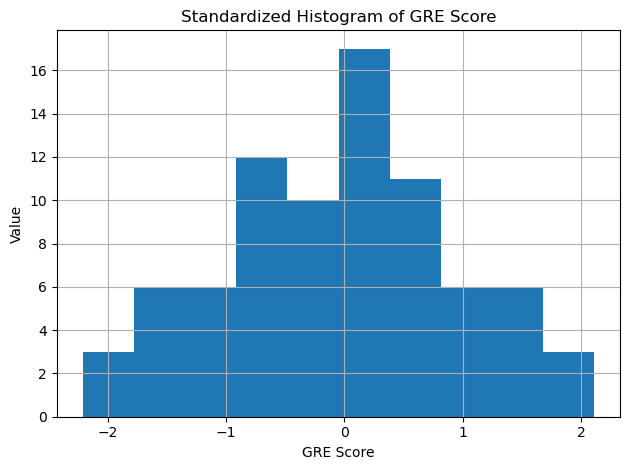

<Figure size 640x480 with 0 Axes>

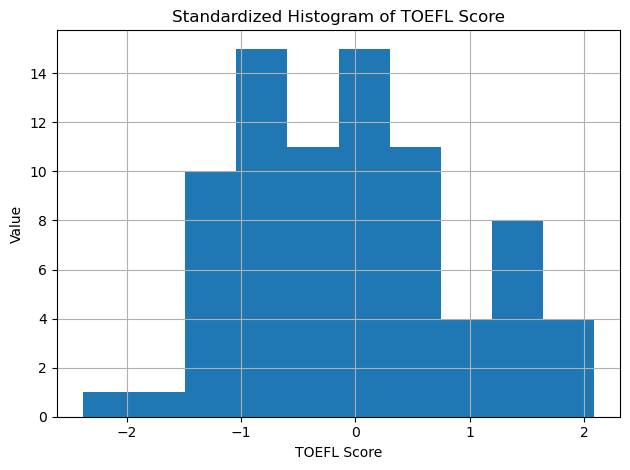

<Figure size 640x480 with 0 Axes>

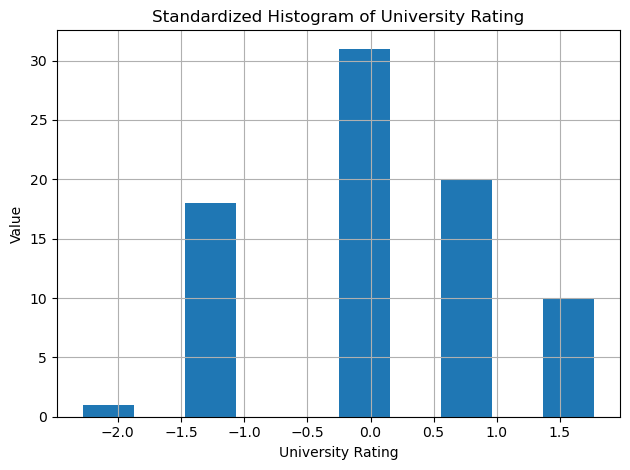

<Figure size 640x480 with 0 Axes>

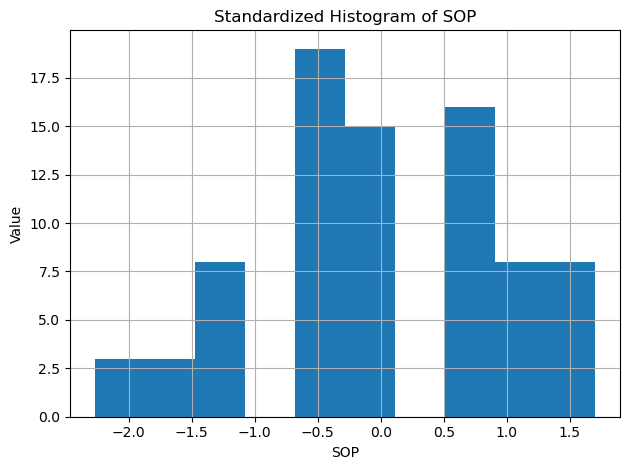

<Figure size 640x480 with 0 Axes>

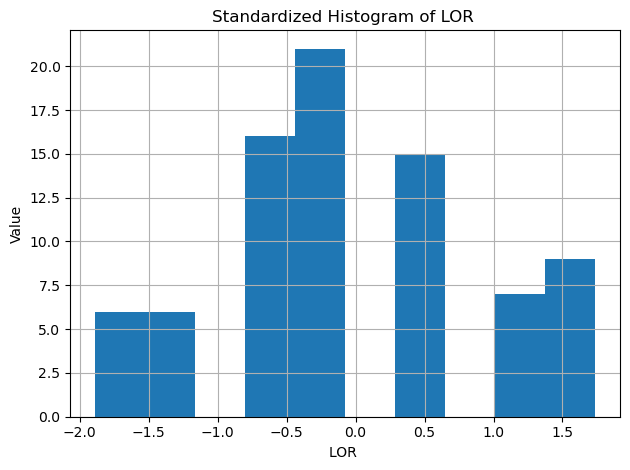

<Figure size 640x480 with 0 Axes>

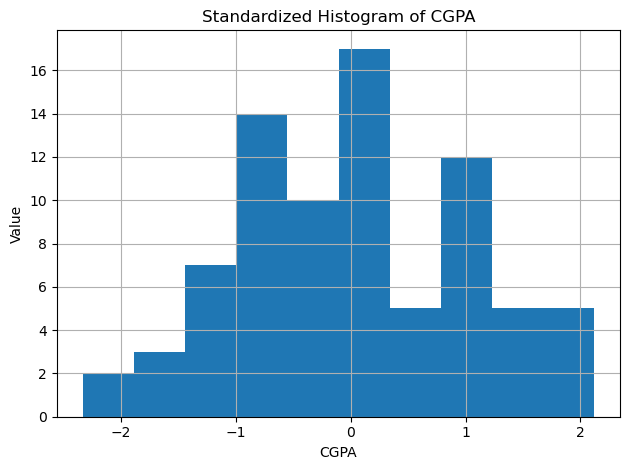

<Figure size 640x480 with 0 Axes>

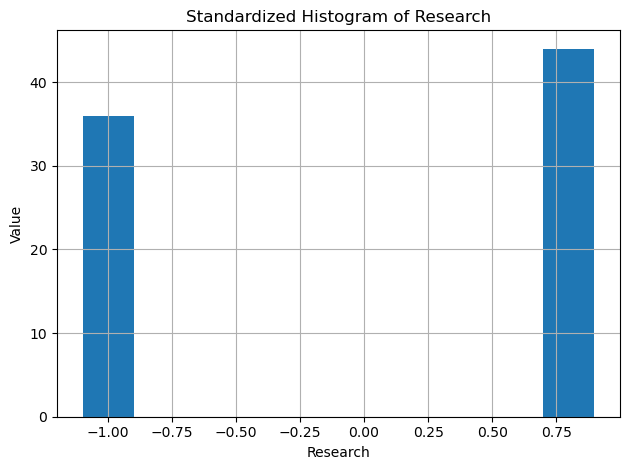

<Figure size 640x480 with 0 Axes>

In [21]:
#Function to standardize the data. Data is standardized in order to being them to the same range.
def standardization_data(df_test):
    for cols in df_test.columns[1:]:
        #Computing mean of the data
        mean = df_test[cols].mean()
        #Computing standard deviation of the data
        std = df_test[cols].std()
        #Standardizing the feature, the features will have a mean = 0 and standard deviation = 1
        df_test[cols] = (df_test[cols] - mean)/std
        #Plotting histogram for all features
        df_test[cols].hist()
        plt.title(f"Standardized Histogram of {cols}")
        plt.xlabel(cols)
        plt.ylabel("Value")
        plt.tight_layout()
        plt.show()
        plt.tight_layout()
        plt.show()
        
standardization_data(df_test)

In [22]:
x_test_array = df_test.to_numpy()
x_SOP_array_test = x_test_array[:,4].reshape(-1,1)
x_LOR_array_test = x_test_array[:,5].reshape(-1,1)

In [23]:
#print(x_SOP_array_test)
#print(x_LOR_array_test)

In [24]:
x_CGPA_final = df.iloc[:,6:7]
x_SOP_final = df.iloc[:,4:5]
y_labels_final = df.iloc[:,9:]

#print(x_CGPA_final.head())
#print(x_SOP_final.head())
#print(y_labels_final)

x_CGPA_array_fin = x_CGPA_final.to_numpy().reshape(-1,1)
x_SOP_array_fin = x_SOP_final.to_numpy().reshape(-1,1)
y_labels_final_array = y_labels_final.to_numpy().reshape(-1,1)

pairs_CGPA_SOP = []
# CGPA and SOP
pair_name = "CGPA_SOP"
pair = np.concatenate((x_CGPA_array_fin, x_SOP_array_fin), axis=1)
pairs_CGPA_SOP.append((pair_name, pair))

pairs_test = []
# SOP and LOR
pair_name = "SOP_LOR"
pair = np.concatenate((x_SOP_array_test, x_LOR_array_test), axis=1)
pairs_test.append((pair_name, pair))

In [25]:
# Train the model with entire training data for chosen configuration
best_model_features = np.concatenate((x_CGPA_array_fin, x_SOP_array_fin), axis=1)
clf = svm.SVC(kernel="rbf")
clf.fit(best_model_features, y_labels_final_array.ravel())

# Predict on test data
test_features = np.concatenate((x_SOP_array_test, x_LOR_array_test), axis=1)
y_predicted = clf.predict(test_features)

# Print the predictions
print("Predictions on Test Set:")
print(y_predicted)

Predictions on Test Set:
[0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 1]


In [26]:
y_predicted.shape

(80,)

In [27]:
final_inference = pd.DataFrame({
    'pred_admit' : y_predicted.reshape(80,)
})

final_inference.to_csv('Arunachalam_Venkatachalam_preds.csv', index=False)